# Calculate a single crystal spectrum
Start by importing some useful routines

In [1]:
import numpy                      as np
import sys, os
home_directory = os.path.join("..","..","..")
examples_directory = os.path.join(home_directory,'Examples')
sys.path.insert(0, home_directory)
from PDielec.HelperRoutines         import getMaterial
from PDielec.HelperRoutines         import calculatePowderSpectrum
from PDielec.HelperRoutines         import calculateSingleCrystalSpectrum
from PDielec.GUI.SingleCrystalLayer import SingleCrystalLayer


## Define the materials to be used.
In this example we read the VASP file in the current directory
The OUTCAR in this directory is for a VASP calculation on ZnO
The support material will be PTFE

In [2]:
ZnO = getMaterial(os.path.join(examples_directory,'Vasp','ZnO','OUTCAR'))
ptfe = getMaterial('ptfe')
sapphire = getMaterial('Sapphire')
air = getMaterial('air')
silica=getMaterial('Fused Silica')

## Build the layers for the system - start with the substrate
The list of layers is bult from the bottom up
The first layer is the substrate and the last is the superstrate

In [3]:
layers = []
layers.append(SingleCrystalLayer(air,thickness=1.0,thicknessUnit='mm'))
layers.append(SingleCrystalLayer(ZnO,hkl=[0,0,1],thickness=1.0,thicknessUnit='um'))
layers.append(SingleCrystalLayer(sapphire,hkl=[0,1,0],thickness=1.0,thicknessUnit='um'))
layers.append(SingleCrystalLayer(air,thickness=1,thicknessUnit='mm'))

## Calculate reflection, transmittance and absorptance of the system


In [4]:
incident_angle = 45
azimuthal_angle = 0
frequencies = np.arange(1,1200,1)
refl,tran,abso = calculateSingleCrystalSpectrum(frequencies,layers,incident_angle,azimuthal_angle)


## Plot the reflectance

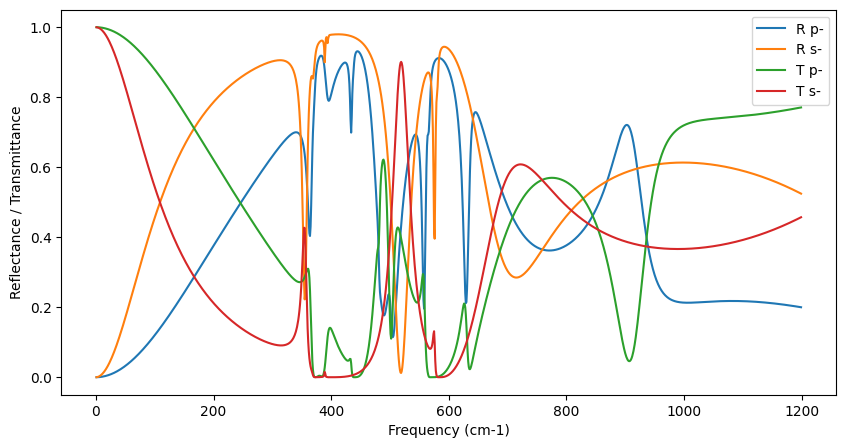

(<matplotlib.legend.Legend at 0x736777f31490>, None)

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # set the size of the figure
plt.plot(frequencies, refl[0],label='R p-') 
plt.plot(frequencies, refl[1],label='R s-')
plt.plot(frequencies, tran[0],label='T p-') 
plt.plot(frequencies, tran[1],label='T s-')
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Reflectance / Transmittance')
plt.legend(), plt.show()